In [1]:
import glob
from pyhdf.SD import SD, SDC
import numpy as np
import math
from __future__ import print_function
import matplotlib
#matplotlib.use('TkAgg')
import pylab
import matplotlib.pyplot as plt
import datetime
import subprocess
from numpy import genfromtxt
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import time
import numexpr as ne
import bottleneck as bn

In [2]:
from __future__ import print_function
import glob
import numpy as np
import math
from pyhdf.SD import SD, SDC
import matplotlib
#matplotlib.use('TkAgg')
import pylab
import matplotlib.pyplot as plt
import datetime

import subprocess
from numpy import genfromtxt
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.graph_objs as go
from scipy.spatial import cKDTree
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import bs4
import itertools
import bottleneck as bn
from scipy.signal import lfilter
from itertools import compress
from numpy import inf
import pandas as pd

In [3]:
DATA = np.load('/home/kumarv/tayal007/MODIS_TILES/h08v05.npy')

In [ ]:
from numpy import genfromtxt
latitude = genfromtxt('/home/kumarv/tayal007/LongLatCoordinates/h08v05/latitide.csv', delimiter=',')
longitude = genfromtxt('/home/kumarv/tayal007/LongLatCoordinates/h08v05/longitude.csv', delimiter=',')

In [4]:
def sortedtimestamp(directorypath):
	timestamps = dict()
	for path in directorypath:
            timestamps[datetime.datetime.strptime(path.split('.')[1][3:], '%y%j').date()] = path.split('.')[1]
	return timestamps;
directorypath = glob.glob("/home/kumarv/tayal007/MODIS_TILES/MODIS_h08v05/*.hdf");
sorteddates = sortedtimestamp(directorypath)
dates = []
for k, v in sorted(sorteddates.items()):
    dates.append(k);

In [5]:
dates = dates[586:631]

In [6]:
def readModisfile(path):
    global mask
    file = SD(path, SDC.READ)
    sds_obj = file.select('Land_Cover_Type_1') 
    mask = np.array(sds_obj.get())
    return mask
mask = readModisfile('/panfs/roc/groups/6/kumarv/tayal007/MODIS_yearly/MCD12Q1.A2013001.h08v05.051.2014308185137.hdf')
mask2012 = readModisfile('/panfs/roc/groups/6/kumarv/tayal007/MODIS_yearly/MCD12Q1.A2012001.h08v05.051.2014288195944.hdf')
mask2011 = readModisfile('/panfs/roc/groups/6/kumarv/tayal007/MODIS_yearly/MCD12Q1.A2011001.h08v05.051.2014288190234.hdf')

In [ ]:
print (mask2011[mask2011 == 12].shape)
print (mask2012[mask2012 == 12].shape)
print (mask2013[mask2013 == 12].shape)

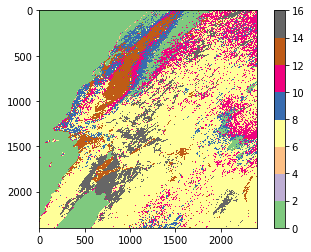

In [7]:
unique, counts = np.unique(mask, return_counts=True)
Tag = ['Water',"Evergreen Needleleaf forest","Evergreen Broadleaf forest","Deciduous Needleleaf forest", "Deciduous Broadleaf forest","Mixed forest","Closed shrublands","Open shrublands","Woody savannas","Savannas","Grasslands","Permanent wetlands"," Croplands","Urban and built-up","Cropland/Natural vegetation mosaic", "Snow and ice","Barren or sparsely vegetated"]
dict1 = {}
dict2 = {}
dict3 = {}
for i,x in enumerate(Tag):
    dict1[x,unique[i]] = counts[i]
    dict2[unique[i]] = x
    dict3[unique[i]] = counts[i]
df = pd.DataFrame(list(sorted(dict1.items())))
plt.imshow(mask, cmap='Accent')
plt.colorbar()
plt.show()

In [ ]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,16,17)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
#scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),cmap=cmap, norm=norm)
plt.imshow(mask, cmap=cmap, norm=norm)
plt.colorbar()


In [34]:
df.columns = ['Labels', 'Value']
df = df.sort_values(by="Value", ascending=False)
df

Labels    Value
10                      (Open shrublands, 7)  2543786
15                                (Water, 0)  1250329
8                           (Grasslands, 10)   555760
1         (Barren or sparsely vegetated, 16)   387816
16                       (Woody savannas, 8)   295298
0                           ( Croplands, 12)   234314
7           (Evergreen Needleleaf forest, 1)   220666
14                  (Urban and built-up, 13)    92678
2                     (Closed shrublands, 6)    82911
12                             (Savannas, 9)    68768
9                          (Mixed forest, 5)    14161
3   (Cropland/Natural vegetation mosaic, 14)    10904
11                  (Permanent wetlands, 11)     1984
6            (Evergreen Broadleaf forest, 2)      371
5           (Deciduous Needleleaf forest, 3)      102
13                        (Snow and ice, 15)      101
4            (Deciduous Broadleaf forest, 4)       51

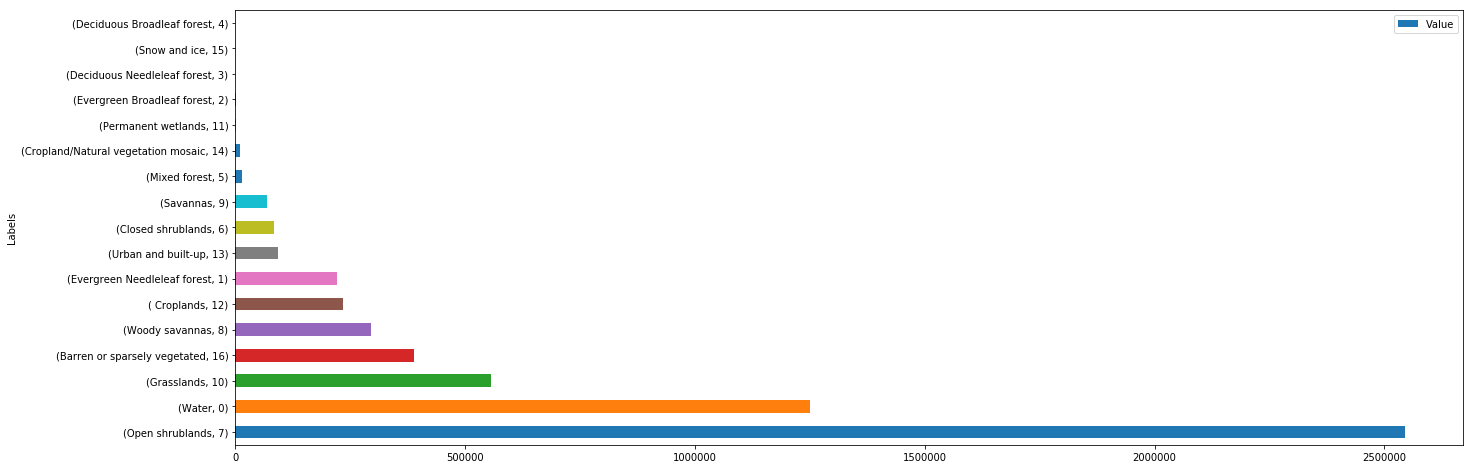

In [35]:
df.plot.barh(x='Labels', y='Value', figsize=(22,8))
fig = plt.gcf()
fig.savefig('output.png')

In [36]:
data2013 = np.copy(DATA[:,:,586:631])
print (data2013.shape)
#data2013[np.isnan(data2013)] = 0
data2013[data2013 < 0] = 0
print (data2013.shape)

(2400, 2400, 45)


/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning:

invalid value encountered in less



(2400, 2400, 45)


In [37]:
def percentage(part, shape):
    whole = shape[0] * shape[1] * shape[2]
    return 100 * float(part)/float(whole)

def cleanNDVI(NDVISTACK):
	print ("Missing value in raw data is ", np.count_nonzero(np.isnan(NDVISTACK)),'which is ' ,percentage(np.count_nonzero(np.isnan(NDVISTACK)),NDVISTACK.shape),'%')
	print ("Infinity value in raw data is ", np.count_nonzero(np.isinf(NDVISTACK)),'which is ' ,percentage(np.count_nonzero(np.isinf(NDVISTACK)),NDVISTACK.shape),'%')
	print ("Greater than 1 is ", np.count_nonzero(NDVISTACK > 1),'which is ' ,percentage(np.count_nonzero(NDVISTACK > 1),NDVISTACK.shape),'%')
	print ("Less than -1 is ", np.count_nonzero(NDVISTACK < -1),'which is ' ,percentage(np.count_nonzero(NDVISTACK < -1),NDVISTACK.shape),'%')
	
	CLEANED_DATA = np.copy(NDVISTACK)
	CLEANED_DATA[NDVISTACK == inf] = np.nan
	CLEANED_DATA[NDVISTACK == -inf] = np.nan
	CLEANED_DATA[NDVISTACK > 1] = np.nan
	CLEANED_DATA[NDVISTACK < -1] = np.nan

	print ("After Cleaning Missing value is ", np.count_nonzero(np.isnan(CLEANED_DATA)),'which is ' ,percentage(np.count_nonzero(np.isnan(CLEANED_DATA)),NDVISTACK.shape),'%')
	return CLEANED_DATA;
data2013 = cleanNDVI(data2013)

Missing value in raw data is  16338907 which is  6.3035906635802466 %
Infinity value in raw data is  160282 which is  0.06183719135802469 %


/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning:

invalid value encountered in greater



Greater than 1 is  1946976 which is  0.7511481481481481 %


/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning:

invalid value encountered in less



Less than -1 is  0 which is  0.0 %


/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning:

invalid value encountered in greater

/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning:

invalid value encountered in less



After Cleaning Missing value is  18285883 which is  7.054738811728395 %


In [38]:
pdframe = {}
crop_data = data2013[mask==12]
#crop_data2 = data2013[mask==7]
#crop_data3 = data2013[mask==10]
#print (crop_data1.shape,crop_data2.shape, crop_data3.shape )
#crop_data = np.vstack((crop_data1[:200000],crop_data2[:200000], crop_data3[:200000]))
print (crop_data.shape)
#noncrop_data = data2013[mask!=12]
#print (noncrop_data.shape)
for i in range(crop_data.shape[-1]):
    pdframe[dates[i]] = crop_data[:,i]
dfframe = pd.DataFrame(pdframe)

(234314, 45)


In [39]:
dfframe = dfframe.loc[dfframe.isnull().mean(axis=1).lt(0.1)]

In [40]:
dfframe

2013-01-01  2013-01-09  2013-01-17  2013-01-25  2013-02-02  \
11        0.477555    0.234010    0.414033    0.316335    0.320282   
12        0.410152    0.252045    0.341844    0.334572    0.338462   
13        0.554928    0.554195    0.547872    0.602005    0.584721   
14        0.517900    0.500700    0.486562    0.498658    0.475453   
31        0.487291    0.495270    0.478823    0.465852    0.526755   
32        0.027948    0.072541    0.112220    0.018147    0.059132   
33        0.000000    0.025533    0.030239    0.287496    0.275964   
35        0.611604    0.579406    0.583592    0.623668    0.652445   
47        0.609385    0.561960    0.532060    0.695437    0.626030   
48        0.416985    0.473050    0.362183    0.495281    0.461272   
52        0.510484    0.522876    0.529927    0.547266    0.568505   
53        0.540398    0.574082    0.539104    0.575677    0.592605   
54        0.552778    0.430697    0.364412    0.471448    0.418705   
60        0.352941    0.236201    0.341382    0.429043    0.489831   
61        0.368713    0.470610    0.413051    0.438702    0.499231   
65        0.540398    0.542543    0.539142    0.575677    0.577533   
66        0.608831    0.557823    0.510638    0.519329    0.550633   
67        0.633649    0.430697    0.465737    0.471448    0.484481   
68        0.401950    0.550671    0.539226    0.621107    0.466915   
76        0.524975    0.524907    0.505786    0.538514    0.522100   
77        0.555999    0.582185    0.511450    0.599210    0.514037   
78        0.496667    0.454616    0.578059    0.631105    0.654619   
80        0.404817    0.489938    0.425820    0.429043    0.544840   
83        0.048041    0.000000    0.016902    0.034832         NaN   
84             NaN         NaN         NaN         NaN    0.150821   
86        0.543059    0.513018    0.485030    0.538124    0.537989   
87        0.543059    0.589105    0.559536    0.596498    0.584131   
88        0.469151    0.442333    0.406075    0.427257    0.433177   
90        0.540736    0.574624    0.509269    0.480399    0.467410   
91        0.518172    0.534060    0.482267    0.534153    0.519743   
...            ...         ...         ...         ...         ...   
234284    0.300763         NaN    0.292969         NaN    0.295253   
234285    0.350387    0.278376    0.280878         NaN    0.290551   
234286    0.301716    0.298277    0.314953    0.292718    0.317614   
234287    0.229769    0.226363    0.241135    0.246502    0.246735   
234288    0.226862    0.211898    0.231027    0.220592    0.235602   
234289    0.223927    0.212618    0.221651    0.217345    0.217861   
234290    0.211328    0.196262    0.214660    0.211632    0.218377   
234291    0.238778    0.239004    0.243137    0.250374    0.253354   
234292    0.268312    0.301775    0.288653    0.255706    0.262136   
234293    0.235934    0.241240    0.263703    0.238686    0.226886   
234294    0.257298    0.269654    0.260575    0.242085    0.229567   
234295    0.272954    0.258850    0.253940    0.243261    0.246356   
234296    0.351741    0.345936    0.339514    0.311098    0.296000   
234297    0.268496    0.288056    0.278292    0.277206    0.262379   
234298    0.256658    0.247900    0.262300    0.259710    0.266864   
234299    0.294984    0.286262    0.279435    0.258081    0.265550   
234300    0.384460    0.446486    0.334644    0.345788    0.433982   
234301    0.299528    0.288256    0.277832    0.283180    0.241989   
234302    0.271193    0.248447    0.247277    0.254333    0.233967   
234303    0.176913    0.163324    0.173656    0.166874    0.184082   
234304    0.190751    0.274119    0.169707    0.166874    0.234246   
234305    0.236280    0.221693    0.209078    0.210103    0.199004   
234306    0.211900    0.195015    0.207954    0.212227         NaN   
234307    0.240189    0.207395    0.213424    0.205163         NaN   
234308    0.190260    0.177093    0.170743    0.173977    0.151470   
234309    0.163379

In [41]:
dfframe = dfframe.interpolate(axis=1)

In [ ]:
cropindex = np.argwhere(mask == 12)
cropindex.shape

In [ ]:
import random
f = plt.figure(figsize=(3, 4))
x_axis = np.arange(0, 45, 1)
axes = plt.gca()
axes.set_ylim([0,1])
for i in range(1):
    m = random.randint(1,dfframe.shape[0])
    print (m, cropindex[m,:], latitude[cropindex[m,:].tolist()[0],cropindex[m,:].tolist()[1]],"," , longitude[cropindex[m,:].tolist()[0],cropindex[m,:].tolist()[1]])
    dfframe.iloc[m].plot()
    

    #plt.plot(x_axis, crop1[i+40000,:])

In [ ]:
latitude[cropindex[m,:].tolist()[0],cropindex[m,:].tolist()[1]]

In [ ]:
dfframe.shape[0]

In [42]:
dfframe = dfframe.loc[dfframe.isnull().mean(axis=1).lt(0.0001)]

In [ ]:
dfframe.iloc[67].plot()

In [43]:
ndarr = dfframe.as_matrix()

/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [44]:
dfframe

2013-01-01  2013-01-09  2013-01-17  2013-01-25  2013-02-02  \
11        0.477555    0.234010    0.414033    0.316335    0.320282   
12        0.410152    0.252045    0.341844    0.334572    0.338462   
13        0.554928    0.554195    0.547872    0.602005    0.584721   
14        0.517900    0.500700    0.486562    0.498658    0.475453   
31        0.487291    0.495270    0.478823    0.465852    0.526755   
32        0.027948    0.072541    0.112220    0.018147    0.059132   
33        0.000000    0.025533    0.030239    0.287496    0.275964   
35        0.611604    0.579406    0.583592    0.623668    0.652445   
47        0.609385    0.561960    0.532060    0.695437    0.626030   
48        0.416985    0.473050    0.362183    0.495281    0.461272   
52        0.510484    0.522876    0.529927    0.547266    0.568505   
53        0.540398    0.574082    0.539104    0.575677    0.592605   
54        0.552778    0.430697    0.364412    0.471448    0.418705   
60        0.352941    0.236201    0.341382    0.429043    0.489831   
61        0.368713    0.470610    0.413051    0.438702    0.499231   
65        0.540398    0.542543    0.539142    0.575677    0.577533   
66        0.608831    0.557823    0.510638    0.519329    0.550633   
67        0.633649    0.430697    0.465737    0.471448    0.484481   
68        0.401950    0.550671    0.539226    0.621107    0.466915   
76        0.524975    0.524907    0.505786    0.538514    0.522100   
77        0.555999    0.582185    0.511450    0.599210    0.514037   
78        0.496667    0.454616    0.578059    0.631105    0.654619   
80        0.404817    0.489938    0.425820    0.429043    0.544840   
83        0.048041    0.000000    0.016902    0.034832    0.024006   
86        0.543059    0.513018    0.485030    0.538124    0.537989   
87        0.543059    0.589105    0.559536    0.596498    0.584131   
88        0.469151    0.442333    0.406075    0.427257    0.433177   
90        0.540736    0.574624    0.509269    0.480399    0.467410   
91        0.518172    0.534060    0.482267    0.534153    0.519743   
92        0.500552    0.516109    0.486010    0.563422    0.554407   
...            ...         ...         ...         ...         ...   
234284    0.300763    0.296866    0.292969    0.294111    0.295253   
234285    0.350387    0.278376    0.280878    0.285715    0.290551   
234286    0.301716    0.298277    0.314953    0.292718    0.317614   
234287    0.229769    0.226363    0.241135    0.246502    0.246735   
234288    0.226862    0.211898    0.231027    0.220592    0.235602   
234289    0.223927    0.212618    0.221651    0.217345    0.217861   
234290    0.211328    0.196262    0.214660    0.211632    0.218377   
234291    0.238778    0.239004    0.243137    0.250374    0.253354   
234292    0.268312    0.301775    0.288653    0.255706    0.262136   
234293    0.235934    0.241240    0.263703    0.238686    0.226886   
234294    0.257298    0.269654    0.260575    0.242085    0.229567   
234295    0.272954    0.258850    0.253940    0.243261    0.246356   
234296    0.351741    0.345936    0.339514    0.311098    0.296000   
234297    0.268496    0.288056    0.278292    0.277206    0.262379   
234298    0.256658    0.247900    0.262300    0.259710    0.266864   
234299    0.294984    0.286262    0.279435    0.258081    0.265550   
234300    0.384460    0.446486    0.334644    0.345788    0.433982   
234301    0.299528    0.288256    0.277832    0.283180    0.241989   
234302    0.271193    0.248447    0.247277    0.254333    0.233967   
234303    0.176913    0.163324    0.173656    0.166874    0.184082   
234304    0.190751    0.274119    0.169707    0.166874    0.234246   
234305    0.236280    0.221693    0.209078    0.210103    0.199004   
234306    0.211900    0.195015    0.207954    0.212227    0.202147   
234307    0.240189    0.207395    0.213424    0.205163    0.196696   
234308    0.190260    0.177093    0.170743    0.173977    0.151470   
234309    0.163379

In [45]:
MaxMin = (np.amax(ndarr, axis=1) - np.amin(ndarr, axis=1))

In [46]:
x_train = ndarr[MaxMin.argsort()[-50000:][::-1]]

In [21]:
x_train = ndarr

In [47]:
np.count_nonzero(np.isnan(x_train))

0

In [27]:
x_train = x_train.T
print (x_train.shape)
timesteps = x_train.shape[0]
input_dim = x_train.shape[1]

(45, 149305)


In [32]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
latent_dim = 7
inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

MemoryError: 

In [48]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 2  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_dim = 45
# this is our input placeholder
input_img = Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_img)
encoded = Dense(16, activation='relu')(encoded)
#encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
#decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

encoder = Model(input_img, encoded)

In [49]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoded3 = autoencoder.layers[-3]
decoded2 = autoencoder.layers[-2]
decoded1 = autoencoder.layers[-1]


decoded_output = decoded1(decoded2(decoded3(encoded_input)))
# create the decoder model
decoder = Model(encoded_input, decoded_output)

In [ ]:
# # from keras.datasets import mnist
# # import numpy as np
# # (x_train, _), (x_test, _) = mnist.load_data()
# # print (x_train.shape)
# # print (x_test.shape)
# # print (x_train.shape[1:])
# # x_train = x_train.astype('float32') / 255.
# # x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print (x_train.shape)
# print (x_test.shape)

In [ ]:
x_train = crop_data[:200000]
x_test = crop_data[200001:]
print (x_train.shape)
#x_train = x_train.reshape((229337, np.prod(833)))
print (x_train.shape)
print (x_test.shape)

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [50]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=2048,
                shuffle=True)

Epoch 1/50
50000/50000 [==============================] - 2s 31us/step - loss: 0.0491
Epoch 2/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0473
Epoch 3/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0456
Epoch 4/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0439
Epoch 5/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0422
Epoch 6/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0407
Epoch 7/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0393
Epoch 8/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0381
Epoch 9/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0369
Epoch 10/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0354
Epoch 11/50
50000/50000 [==============================] - 0s 3us/step - loss: 0.0338
Epoch 12/50
50000/50000 [==============================] - 0s 

In [51]:
p = data2013[mask == 12]
print (p[5,:].shape)
x = p[5,:].reshape((1, -1))
print (x.shape)
#encoder.predict(p[5,:])
autoencoder.predict(x)
encoder.predict(x)

(45,)
(1, 45)


array([[1.0203102 , 0.08154453]], dtype=float32)

In [52]:
print (p.shape)
recons_imgs = encoder.predict(p[:50000,],2048,1)

(234314, 45)
50000/50000 [==============================] - 0s 1us/step


In [ ]:
temp = []	
	for i in range(2400):
		for j in range(2400):
			tup = latitude[i,j], longitude[i,j]
			temp.append(tup)
	LatLongdata = np.array(temp)

In [ ]:
from scipy.spatial import cKDTree
LatLongtree = cKDTree(recons_imgs)

In [ ]:
dists, indexed = LatLongtree.query(np.array([latitude,longitude]), k = 1)

In [79]:
import matplotlib.pyplot
import pylab

x = recons_imgs[:,0]
y = recons_imgs[:,1]
plt.subplot(1, 2, 1)
plt.plot(x,y, linestyle='', marker='o', markersize=0.5)

while True:
     x = plt.ginput(1)
     print("clicked", x)
     ax1 = plt.subplot(1,2,2)
     #plot(float(x[0][0]),float(x[0][1]))
     q = np.array(decoder.predict(np.array([float(x[0][0]),float(x[0][1])]).reshape((1, -1)))).T
     ax1.plot(dates,q)
     ax1.set_ylim([0, 1])
plt.show()

# plt.imshow(p)

clicked [(3.7291227293014533, 2.3851730737817998)]
clicked [(3.7291227293014533, 2.378077723133948)]


/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



clicked [(3.7181950956134395, 2.3922684244296515)]
clicked [(3.7509779966774817, 2.378077723133948)]
clicked [(3.7509779966774817, 2.3355056192468386)]
clicked [(3.816543798805566, 2.3142195673032835)]
clicked [(3.8274714324935797, 2.3496963205425416)]
clicked [(3.696339828237411, 2.3355056192468386)]
clicked [(3.6854121945493974, 2.3000288660075805), (3.7181950956134395, 2.2574567621204706)]
clicked [(3.783760897741524, 2.2432660608247676), (3.88210960093365, 2.2787428140640253), (3.893037234621664, 2.3496963205425416)]
clicked [(3.805616165117552, 2.378077723133948), (3.663556927173369, 2.3922684244296515)]
clicked [(3.6089187587332994, 2.328410268598987), (3.6417016597973415, 2.229075359529064), (3.7072674619254258, 2.179407904994103)]
clicked [(3.77283326405351, 2.158121853050548)]
clicked [(3.8274714324935797, 2.1155497491634385)]
clicked [(3.401293718661032, 2.4632219309081678)]
clicked [(3.7946885314295375, 2.3851730737817998)]
clicked [(3.893037234621664, 2.4845079828517225)]
c

IndexError: list index out of range

In [201]:
import plotly.plotly as py
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='Kshitij123', api_key='XT7SgVCwq3GFDxyu8K7G')
# Create random data with numpy
import numpy as np


# Create a trace
trace = go.Scatter(
    x = recons_imgs[:,0],
    y = recons_imgs[:,1],
    mode = 'markers'
)

data = [trace]
py.iplot(data, filename='basic-scatter')
# Plot and embed in ipython notebook!
#while True:
#     x = plt.ginput(1)
# #     print (NDVISTACK[int(round(x[0][1])),int(round(x[0][0])),:])
#     print("clicked", x)
#     #lat = latitude[int(round(x[0][0]))][int(round(x[0][1]))]
#     #long = longitude[int(round(x[0][0]))][int(round(x[0][1]))]
#     #print ('http://maps.google.com/?q=' + str(lat) + ',' + str(long))
#     #showtimeseries(int(round(x[0][0])), int(round(x[0][1])));
    
# plt.show()


# or plot with: plot_url = py.plot(data, filename='basic-line')

In [188]:
def plot(x,y):
    q = np.array(decoder.predict(np.array([x,y]).reshape((1, -1)))).T
    DG_data = go.Scatter(x=dates, y=q)
    data = [DG_data]
    fig = go.Figure(dict(data=data))
    return py.iplot(data, filename='basic-scatter')
    #pyplot(data, filename='basic-scatter')
    #plotly.offline.plot(data, filename='/home/kumarv/tayal007/Plots/plotly2.html',auto_open=False)

In [140]:
recons_imgs.reshape(recons_imgs.shape).transpose().shape

(2, 10000)

In [ ]:
print (data2013.shape)
print (data2013.reshape(data2013.shape[0] * data2013.shape[1],data2013.shape[2]).shape)
noncrop_data = data2013.reshape(data2013.shape[0] * data2013.shape[1],data2013.shape[2])
x_test = noncrop_data
recons_imgs = autoencoder.predict(x_test,2048,1)
mse = ((noncrop_data - recons_imgs) ** 2).mean(axis=1)

In [ ]:
print (len(mse))
print (max(mse))
print (min(mse))
max_sim = np.argpartition(mse, -10000)[-10000:] #index of top elements
#print (max_sim)
min_sim = mse.argsort()[:10000] #index of min elements
#print (min_sim)

In [ ]:
testmask = mask.flatten()
#print (testmask.shape)
#print (mse[max_sim])
#print (dict2[p for p in testmask[max_sim]])
#print (testmask[min_sim])

In [ ]:
maxdivergentdict = {}

unique, counts = np.unique(testmask[max_sim], return_counts=True)
for i in unique:
    maxdivergentdict[dict2[unique[i]]] = counts[i]
maxdivergentdf = pd.DataFrame(list(sorted(maxdivergentdict.items())))
maxdivergentdf.columns = ['Labels', 'Value']
maxdivergentdf = maxdivergentdf.sort_values(by="Value", ascending=False)
maxdivergentdf.plot.barh(x='Labels', y='Value', figsize=(22,8))

In [ ]:
mindivergentdict = {}
unique, counts = np.unique(testmask[min_sim], return_counts=True)
print (unique, counts)
for i in range(len(unique)):
    mindivergentdict[dict2[unique[i]]] = counts[i]
mindivergentdf = pd.DataFrame(list(sorted(mindivergentdict.items())))
mindivergentdf.columns = ['Labels', 'Value']
mindivergentdf = mindivergentdf.sort_values(by="Value", ascending=False)
mindivergentdf.plot.barh(x='Labels', y='Value', figsize=(22,8))

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
import random
n = 10  # how many digits we will display
f = plt.figure(figsize=(20, 20
                       ))
for i in range(n):
    # display original
    ax = plt.subplot(n, 1, i + 1)
    m = random.randint(1,20000)
    plt.plot(x_train[m])
    print (encoder.predict(x_train[m]))
    plt.plot(recons_imgs[m],'-r')
    
#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.plot(recons_imgs[i],'-r')
plt.show()
#fig = plt.gcf()
#f.savefig("foo.pdf", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import random
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("foo_1.pdf")
for j in range(len(dict2)):
    data = data2013[mask==j]
    recons_imgs = autoencoder.predict(data,2048,1)

    n = 5  # how many digits we will display
    f = plt.figure(figsize=(10, 10))
    for i in range(n):
        # display original
        ax = plt.subplot(n, 1, i + 1)
        m = random.randint(1,dict3[j])
        plt.plot(data[m], label = dict2[j])
        plt.plot(recons_imgs[m],'-r')
        plt.legend()
    pdf.savefig(f)
#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.plot(recons_imgs[i],'-r')
plt.show()
pdf.close()
#fig = plt.gcf()
#f.savefig("foo_16.pdf", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import random
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("foo_1.pdf")

for j in range(0,5000,1000):
    #data = data2013[mask==j]
    data = x_test
    recons_imgs = autoencoder.predict(data,2048,1)

    n = 5  # how many digits we will display
    f = plt.figure(figsize=(10, 10))
    for i in range(n):
        # display original
        ax = plt.subplot(n, 1, i + 1)
        plt.plot(data[i+j])
        plt.plot(recons_imgs[i+j],'-r')
        #plt.legend()
    pdf.savefig(f)
plt.show()
pdf.close()
#fig = plt.gcf()
#f.savefig("foo_16.pdf", bbox_inches='tight')

In [ ]:
dict2, dict3

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

f = plt.figure(figsize=(16, 4))
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(0, 45, 1)
print (len(x_axis))
# Mean = 0, SD = 2.
plt.plot(x_axis, (norm.pdf(x_axis,28,7))*15 )
#plt.plot(x_axis, norm.pdf(x_axis,-1,5) + 0.2)
#plt.plot(x_axis, norm.pdf(x_axis,+1,5) + 0.2)
plt.show()

In [ ]:
x_test = np.zeros(shape=(10000,45))
k = 0
for i in range(5):
    for j in range(2000):
         x_test[k:] = ((norm.pdf(x_axis,5+(j/10.0),7) * (10 + i)))
         k = k + 1

In [ ]:
f = plt.figure(figsize=(16, 4))
x_axis = np.arange(0, 45, 1)
for i in range(2000,2010):
    plt.plot(x_axis, x_test[i,:])

In [ ]:
crop.shape

In [ ]:
f = plt.figure(figsize=(15, 4))
x_axis = np.arange(0, 45, 1)
for i in range(1000):
    plt.plot(x_axis, crop[i+2000,:])

In [ ]:
f = plt.figure(figsize=(15, 4))
x_axis = np.arange(0, 45, 1)
axes = plt.gca()
axes.set_ylim([0,1])
for i in range(10):
    plt.plot(x_axis, crop1[i+40000,:])

In [ ]:
ndarr = np.copy(data2013[mask == 12])
MaxMin = (np.amax(ndarr, axis=1) - np.amin(ndarr, axis=1))
crop = ndarr[MaxMin.argsort()[-50000:][::-1]]

In [ ]:
ndarr1 = np.copy(data2013[mask == 3])
MaxMin1 = (np.amax(ndarr1, axis=1) - np.amin(ndarr1, axis=1))
crop1 = ndarr1[MaxMin.argsort()[-500:][::-1]]

In [ ]:
crop1.shape